In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('drive/My Drive/Extra/Q3')
from HodaDatasetReader import read_hoda_cdb,read_hoda_dataset

In [ ]:
print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='drive/My Drive/Extra/Q3/Train 60000.cdb',images_height=40,images_width=40,one_hot=True,reshape=True)
print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='drive/My Drive/Extra/Q3/Test 20000.cdb',images_height=40,images_width=40,one_hot=True,reshape=True)
print('Reading remaining samples dataset (RemainingSamples.cdb)...')
X_remaining, Y_remaining = read_hoda_dataset('drive/My Drive/Extra/Q3/RemainingSamples.cdb',images_height=40,images_width=40,one_hot=True,reshape=True)

Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...
Reading remaining samples dataset (RemainingSamples.cdb)...


In [ ]:
# reshape input digit images to 64x64x1
X_train = X_train.reshape([-1, 40, 40, 1])


# reshape input letter images to 64x64x1
X_test = X_test.reshape([-1, 40, 40, 1])




In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
X_train.shape

(60000, 40, 40, 1)

In [ ]:

import numpy as np
import pandas as pd
from IPython.display import display 

import csv
from PIL import Image
from scipy.ndimage import rotate

%matplotlib inline
import tensorflow
from tensorflow.keras.optimizers import Adadelta,Adam,SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense,Flatten



In [ ]:


def create_model(optimizer):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', input_shape=(40, 40, 1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=128, kernel_size=3,strides=(1,1), padding='same',  activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1),padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=256, kernel_size=3,strides=(1,1), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=256, kernel_size=3,strides=(1,1), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=512, kernel_size=3, strides=(1,1),padding='same',  activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=512, kernel_size=3, strides=(1,1), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.4))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Compile model

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

In [ ]:

curr_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 40, 40, 64)        640       
                                                                 
 batch_normalization_16 (Bat  (None, 40, 40, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 batch_normalization_17 (Bat  (None, 20, 20, 128)     

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

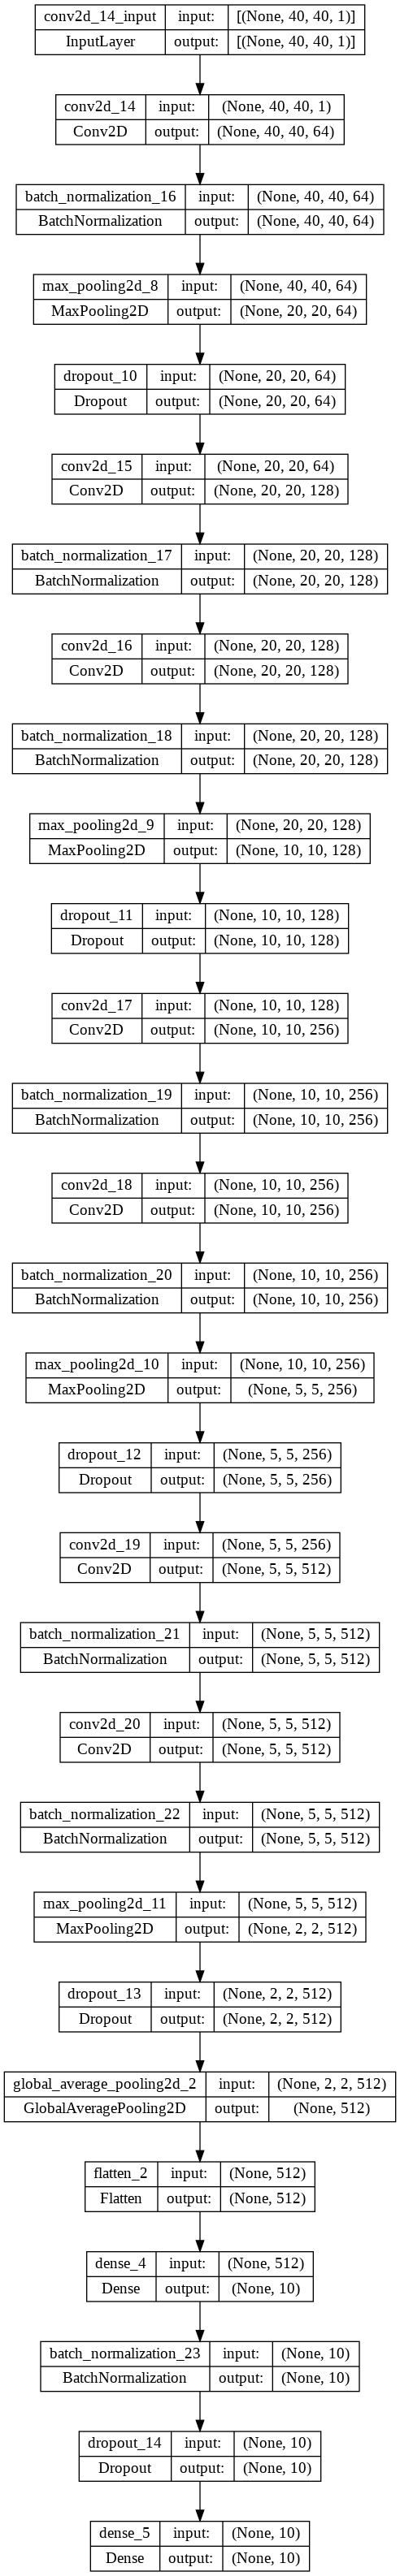

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils import plot_model
from google.colab import files

plot_model(curr_model, to_file="model.png", show_shapes=True)
plt.savefig("drive/My Drive/Extra/Q3/model.png")
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

# **Momentum Optimizer**

In [ ]:
epochs = 20
batch_size = 32

opt= tensorflow.keras.optimizers.SGD(learning_rate=0.001,  momentum=0.9)
curr_model = create_model(opt)
history=curr_model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    epochs=epochs, batch_size=batch_size, verbose=1)
print("=============================================================================")

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 1.2173 - accuracy: 0.5423 - val_loss: 0.3446 - val_accuracy: 0.8844
Epoch 2/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.8002 - accuracy: 0.6589 - val_loss: 0.2336 - val_accuracy: 0.8846
Epoch 3/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6207 - accuracy: 0.7219 - val_loss: 0.1781 - val_accuracy: 0.8939
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5367 - accuracy: 0.7441 - val_loss: 0.1769 - val_accuracy: 0.8913
Epoch 5/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4960 - accuracy: 0.7540 - val_loss: 0.1683 - val_accuracy: 0.8929
Epoch 6/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4650 - accuracy: 0.7645 - val_loss: 0.1813 - val_accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4405 - accuracy: 0.7743 - val_loss: 0.1645 -

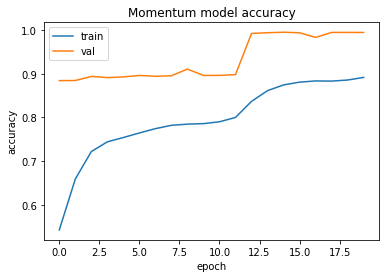

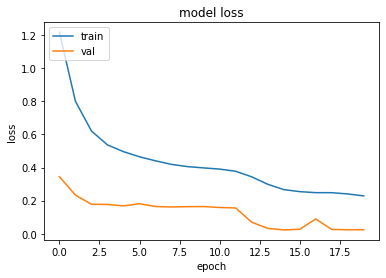

In [ ]:

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Momentum model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred=curr_model.predict(X_test)

625/625 [==============================] - 4s 6ms/step


In [ ]:
from sklearn.metrics import classification_report
y_pred=curr_model.predict(X_test)

print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2000
           1       0.99      1.00      1.00      2000
           2       0.98      1.00      0.99      2000
           3       1.00      0.98      0.99      2000
           4       0.99      0.99      0.99      2000
           5       1.00      0.99      0.99      2000
           6       1.00      1.00      1.00      2000
           7       1.00      1.00      1.00      2000
           8       1.00      1.00      1.00      2000
           9       1.00      0.99      1.00      2000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



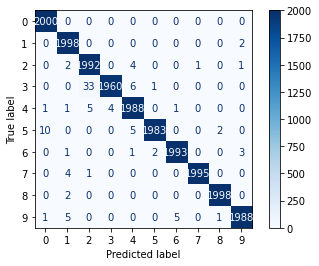

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# **Adam Optimizer**

In [ ]:
epochs = 20
batch_size = 32 
opt=tensorflow.keras.optimizers.Adam()
curr_model =  create_model(opt)
history=curr_model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    epochs=epochs, batch_size=batch_size, verbose=1)
print("=============================================================================")

Epoch 1/20
1875/1875 [==============================] - 46s 23ms/step - loss: 1.0154 - accuracy: 0.5970 - val_loss: 0.2076 - val_accuracy: 0.8882
Epoch 2/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4902 - accuracy: 0.7710 - val_loss: 0.1794 - val_accuracy: 0.9344
Epoch 3/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4066 - accuracy: 0.8051 - val_loss: 0.1597 - val_accuracy: 0.9341
Epoch 4/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3330 - accuracy: 0.8638 - val_loss: 0.0563 - val_accuracy: 0.9909
Epoch 5/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2841 - accuracy: 0.8911 - val_loss: 0.1410 - val_accuracy: 0.9616
Epoch 6/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2539 - accuracy: 0.9019 - val_loss: 0.0375 - val_accuracy: 0.9935
Epoch 7/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2272 - accuracy: 0.9090 - val_loss: 0.0311 -

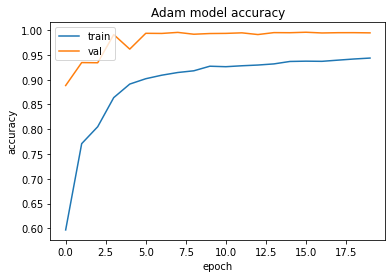

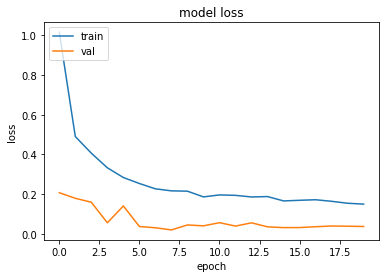

In [ ]:

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adam model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=curr_model.predict(X_test)

print("Adam Result:",classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

625/625 [==============================] - 4s 6ms/step
Adam Result:               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2000
           1       0.99      1.00      1.00      2000
           2       0.98      1.00      0.99      2000
           3       0.99      0.98      0.99      2000
           4       0.99      0.99      0.99      2000
           5       1.00      0.99      0.99      2000
           6       1.00      1.00      1.00      2000
           7       1.00      1.00      1.00      2000
           8       1.00      1.00      1.00      2000
           9       0.99      0.99      0.99      2000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



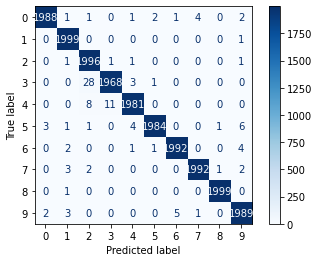

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# **Adadelta Optimizer**

In [ ]:
epochs = 20
batch_size = 32 
opt=tensorflow.keras.optimizers.Adadelta()
curr_model =  create_model(opt)
history=curr_model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    epochs=epochs, batch_size=batch_size, verbose=1)
print("=============================================================================")

Epoch 1/20
1875/1875 [==============================] - 44s 23ms/step - loss: 2.3332 - accuracy: 0.1461 - val_loss: 1.9971 - val_accuracy: 0.3348
Epoch 2/20
1875/1875 [==============================] - 42s 23ms/step - loss: 2.1517 - accuracy: 0.2064 - val_loss: 1.8782 - val_accuracy: 0.3038
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 1.9133 - accuracy: 0.2995 - val_loss: 1.6981 - val_accuracy: 0.4448
Epoch 4/20
1875/1875 [==============================] - 41s 22ms/step - loss: 1.7874 - accuracy: 0.3519 - val_loss: 1.5849 - val_accuracy: 0.4910
Epoch 5/20
1875/1875 [==============================] - 43s 23ms/step - loss: 1.7267 - accuracy: 0.3805 - val_loss: 1.5398 - val_accuracy: 0.5282
Epoch 6/20
1875/1875 [==============================] - 41s 22ms/step - loss: 1.6710 - accuracy: 0.4114 - val_loss: 1.4990 - val_accuracy: 0.5426
Epoch 7/20
1875/1875 [==============================] - 41s 22ms/step - loss: 1.6244 - accuracy: 0.4355 - val_loss: 1.4270 -

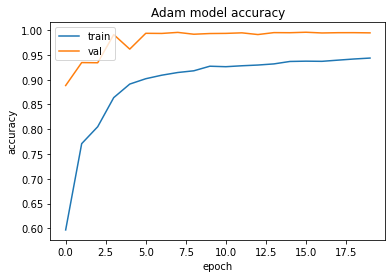

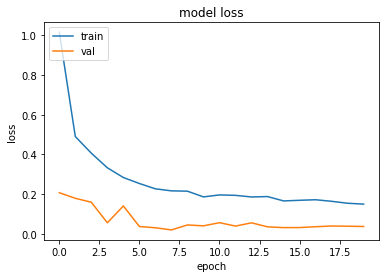

In [ ]:

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adam model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=curr_model.predict(X_test)

print("Adam Result:",classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

625/625 [==============================] - 4s 6ms/step
Adam Result:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2000
           1       0.91      0.99      0.95      2000
           2       0.80      0.88      0.84      2000
           3       0.87      0.90      0.88      2000
           4       0.95      0.81      0.88      2000
           5       1.00      0.83      0.91      2000
           6       0.94      0.88      0.91      2000
           7       0.98      0.94      0.96      2000
           8       0.86      0.98      0.92      2000
           9       0.91      0.89      0.90      2000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



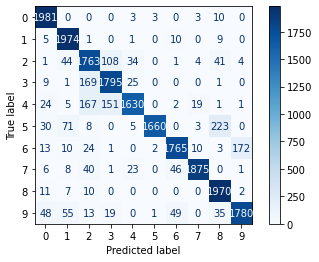

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
